In [3]:
%pylab inline
import os
import DracoPy
import vtk
from vtk.util import numpy_support

import trako as TKO

%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [4]:
DATADIR = '/home/d/DATA/Dropbox/AnatomicalTracts/'

In [14]:
files = os.listdir(os.path.join(DATADIR))
files[-1]

'T_CC2_comm.vtp'

In [15]:
r = vtk.vtkXMLPolyDataReader()
r.SetFileName(os.path.join(DATADIR,files[-1]))
r.Update()
polydata = r.GetOutput()

In [16]:
points = numpy_support.vtk_to_numpy(polydata.GetPoints().GetData())

print('bytes', points.nbytes)
print('count', len(points.ravel()))

pointdata = polydata.GetPointData()
number_of_scalars = pointdata.GetNumberOfArrays()
scalars = []
scalar_names = []#np.empty((10,20),dtype=np.byte)

for i in range(number_of_scalars):
    arr_name = pointdata.GetArrayName(i)
    scalar_names.append(arr_name[0:20])
    scalar_array = numpy_support.vtk_to_numpy(pointdata.GetArray(i))
    print('Loading Scalar', arr_name, 'bytes', scalar_array.nbytes)
    scalars.append(scalar_array)


bytes 121980
count 30495
Loading Scalar EstimatedUncertainty bytes 40660
Loading Scalar tensor2 bytes 365940
Loading Scalar HemisphereLocataion bytes 40660
Loading Scalar cluster_idx bytes 40660
Loading Scalar tensor1 bytes 365940


Position+Sequential
compressed bytes 37060
ratio 3.2914193200215864
restored count 30495
(0.0, 0.003131866455078125, 0.0015616513540255797, 0.0009057480542424094)


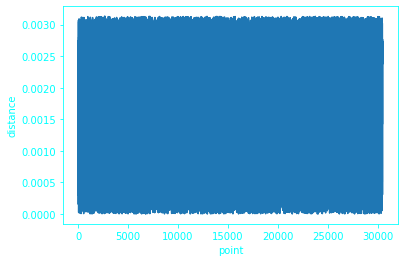

before
 [[12.891451  30.606394   5.044179 ]
 [12.31178   29.254335   6.0755835]
 [11.746206  28.00153    7.2296824]
 [11.250653  26.72078    8.3856735]
 [10.90148   25.36726    9.516229 ]
 [10.618393  23.992828  10.643436 ]
 [10.341799  22.556036  11.6909075]
 [10.108706  21.311531  12.495029 ]
 [ 9.870298  20.058992  13.285101 ]
 [ 9.505172  18.528988  14.15874  ]]
after
 [[12.89207077 30.60679245  5.04499054]
 [12.31020737 29.25536346  6.07733154]
 [11.74711227 28.00403976  7.22854805]
 [11.25283813 26.72143555  8.38602257]
 [10.90246582 25.37000656  9.51846886]
 [10.62091827 23.99355125 10.64465904]
 [10.33937073 22.55452919 11.68951416]
 [10.10787582 21.3094635  12.49661636]
 [ 9.87012482 20.05814171 13.28495026]
 [ 9.50724411 18.53152847 14.16087723]]


In [17]:
print('Position+Sequential')
compressed_points = DracoPy.encode_point_cloud_to_buffer(points.ravel(), position=True, sequential=True, quantization_bits=14, create_metadata=True)
print('compressed bytes', len(compressed_points))
print('ratio', points.nbytes / len(compressed_points))
restored_points = DracoPy.decode_point_cloud_buffer(compressed_points)
print('restored count', len(restored_points.points))
stats, distances = TKO.Util.error(points.ravel()[0:len(restored_points.points)], restored_points.points)
print(stats)
TKO.Util.plot(distances, 'point', 'distance')
print('before\n', points[0:10])
print('after\n', np.array(restored_points.points[0:30]).reshape(10,3))

******************** EstimatedUncertainty
Position+Sequential
count 10165
compressed bytes 15401
ratio 2.640088305954159
restored count 10164
(0.0, 0.3330078125, 0.16420667483927648, 0.09793183378297564)


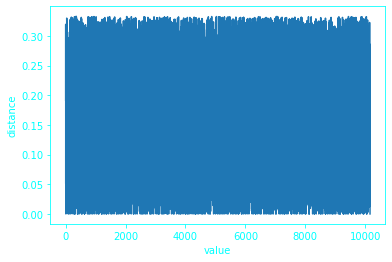

before
 [2.8609712e+03 2.4566289e+03 2.0698005e+03 1.6840557e+03 1.2847665e+03
 8.8303156e+02 4.5196829e+02 3.1622775e-02 4.5217722e+02 8.8545032e+02
 1.2899471e+03 1.6966227e+03 2.1101736e+03 2.5257859e+03 2.9395908e+03
 3.3365173e+03 3.6784241e+03 3.7688020e+03 3.5122766e+03 3.5836345e+03
 3.8020964e+03 4.0352368e+03 4.1818218e+03 4.2426255e+03 4.0714583e+03
 3.5246824e+03 3.4398235e+03 3.5489651e+03 3.6702285e+03 3.7941084e+03]
after
 [2.86077954e+03 2.45694824e+03 2.06974951e+03 1.68388110e+03
 1.28470691e+03 8.82871704e+02 4.51763641e+02 3.16227749e-02
 4.52428925e+02 8.85532837e+02 1.29002930e+03 1.69652161e+03
 2.11033228e+03 2.52547314e+03 2.93928369e+03 3.33646191e+03
 3.67842114e+03 3.76890063e+03 3.51209863e+03 3.58394995e+03
 3.80216504e+03 4.03501660e+03 4.18204590e+03 4.24258740e+03
 4.07160767e+03 3.52473901e+03 3.43958203e+03 3.54868945e+03
 3.67043774e+03 3.79418164e+03]
******************** tensor2
Position+Sequential
count 91485
compressed bytes 160742
ratio 2.276567

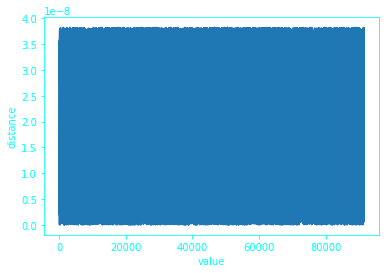

before
 [ 4.4696376e-04  4.4503646e-05 -2.2678483e-05  4.4503646e-05
  5.2222644e-04 -4.8875765e-05 -2.2678483e-05 -4.8875765e-05
  4.5122043e-04  4.4057364e-04  4.1671210e-05 -3.3299784e-05
  4.1671210e-05  4.9264327e-04 -6.0069215e-05 -3.3299784e-05
 -6.0069215e-05  4.6547470e-04  4.2986049e-04  3.9973129e-05
 -3.5044301e-05  3.9973129e-05  4.7639926e-04 -6.0949798e-05
 -3.5044301e-05 -6.0949798e-05  4.6031160e-04  4.0071885e-04
  2.6881697e-05 -1.8622988e-05]
after
 [ 4.46946418e-04  4.45035985e-05 -2.26748525e-05  4.45035985e-05
  5.22208691e-04 -4.88829246e-05 -2.26593693e-05 -4.88674268e-05
  4.51209839e-04  4.40604519e-04  4.16764815e-05 -3.32956115e-05
  4.16764815e-05  4.92638617e-04 -6.00385392e-05 -3.32801137e-05
 -6.00994681e-05  4.65498189e-04  4.29830980e-04  3.99955024e-05
 -3.50530026e-05  3.99955024e-05  4.76363639e-04 -6.09554409e-05
 -3.50375194e-05 -6.09399576e-05  4.60302399e-04  4.00719349e-04
  2.68532604e-05 -1.86252146e-05]
******************** HemisphereLocata

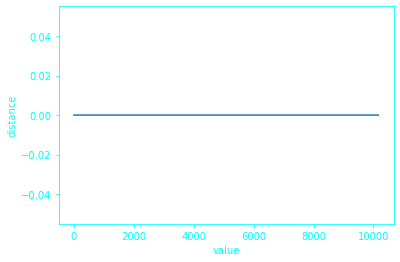

before
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
after
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
******************** cluster_idx
Position+Sequential
count 10165
compressed bytes 180
ratio 225.88888888888889
restored count 10164
(0.0, 0.0003662109375, 0.00020194926256272136, 0.00014826819811660923)


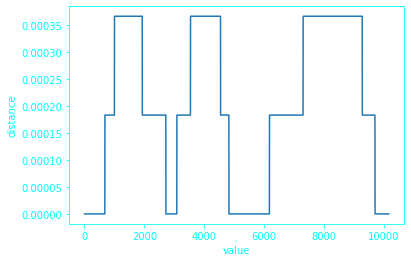

before
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
after
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
******************** tensor1
Position+Sequential
count 91485
compressed bytes 159777
ratio 2.2903171294992397
restored count 91485
(0.0, 6.880145519971848e-08, 3.439031006883724e-08, 1.9863069546530343e-08)


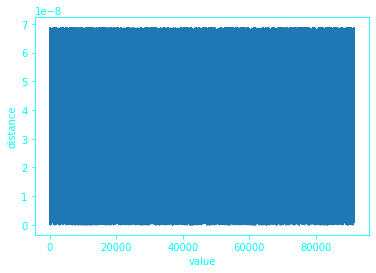

before
 [ 4.6402210e-04  2.1864673e-05 -1.3112162e-05  2.1864673e-05
  5.1413313e-04 -3.4968150e-05 -1.3112162e-05 -3.4968150e-05
  4.7679365e-04  4.4859896e-04  2.4257266e-05 -1.7004028e-05
  2.4257266e-05  5.0378015e-04 -4.5093253e-05 -1.7004028e-05
 -4.5093253e-05  4.7106168e-04  4.3442045e-04  2.2722310e-05
 -1.6282571e-05  2.2722310e-05  4.9375778e-04 -4.8039368e-05
 -1.6282571e-05 -4.8039368e-05  4.6114341e-04  4.0422191e-04
  3.8572485e-05 -3.1007745e-05]
after
 [ 4.64018260e-04  2.19076755e-05 -1.31662237e-05  2.19076755e-05
  5.14179992e-04 -3.50175542e-05 -1.31368288e-05 -3.49881011e-05
  4.76769812e-04  4.48626175e-04  2.42439564e-05 -1.70142739e-05
  2.42439564e-05  5.03735442e-04 -4.50498774e-05 -1.69848790e-05
 -4.51579108e-05  4.70997824e-04  4.34470887e-04  2.27322453e-05
 -1.63271325e-05  2.27322453e-05  4.93703003e-04 -4.80733579e-05
 -1.62977376e-05 -4.80439048e-05  4.61102871e-04  4.04236431e-04
  3.85366729e-05 -3.10320756e-05]


In [18]:
ratios1 = []
for i in range(len(scalars)):
    print('*'*20, scalar_names[i])
    print('Position+Sequential')
    scalar = scalars[i].ravel()
    print('count', len(scalar))
    compressed_scalars = DracoPy.encode_point_cloud_to_buffer(scalar, position=True, sequential=True, quantization_bits=14, create_metadata=True)
    print('compressed bytes', len(compressed_scalars))
    ratio = scalar.nbytes / len(compressed_scalars)
    ratios1.append(ratio)
    print('ratio', ratio)
    restored_scalars = DracoPy.decode_point_cloud_buffer(compressed_scalars)
    print('restored count', len(restored_scalars.points))
    stats, distances = TKO.Util.error(scalar.ravel()[0:len(restored_scalars.points)], restored_scalars.points)
    print(stats)
    TKO.Util.plot(distances, 'value', 'distance')
    print('before\n', scalar[0:30])
    print('after\n', np.array(restored_scalars.points[0:30]))

******************** EstimatedUncertainty
Generic+Sequential
compressed bytes 15220
ratio 2.671484888304862
restored count 10165
(0.0, 0.3330078125, 0.16420826684414197, 0.09792714808384265)


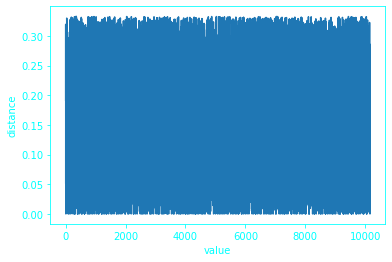

before
 [2.8609712e+03 2.4566289e+03 2.0698005e+03 1.6840557e+03 1.2847665e+03
 8.8303156e+02 4.5196829e+02 3.1622775e-02 4.5217722e+02 8.8545032e+02
 1.2899471e+03 1.6966227e+03 2.1101736e+03 2.5257859e+03 2.9395908e+03
 3.3365173e+03 3.6784241e+03 3.7688020e+03 3.5122766e+03 3.5836345e+03
 3.8020964e+03 4.0352368e+03 4.1818218e+03 4.2426255e+03 4.0714583e+03
 3.5246824e+03 3.4398235e+03 3.5489651e+03 3.6702285e+03 3.7941084e+03]
after
 [2.86077954e+03 2.45694824e+03 2.06974951e+03 1.68388110e+03
 1.28470691e+03 8.82871704e+02 4.51763641e+02 3.16227749e-02
 4.52428925e+02 8.85532837e+02 1.29002930e+03 1.69652161e+03
 2.11033228e+03 2.52547314e+03 2.93928369e+03 3.33646191e+03
 3.67842114e+03 3.76890063e+03 3.51209863e+03 3.58394995e+03
 3.80216504e+03 4.03501660e+03 4.18204590e+03 4.24258740e+03
 4.07160767e+03 3.52473901e+03 3.43958203e+03 3.54868945e+03
 3.67043774e+03 3.79418164e+03]
******************** tensor2
Generic+Sequential
compressed bytes 164656
ratio 2.2224516567874844
re

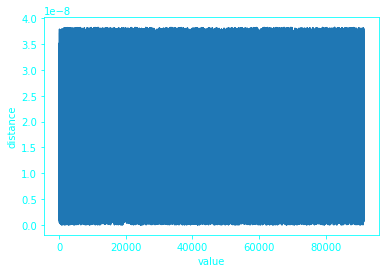

before
 [ 4.4696376e-04  4.4503646e-05 -2.2678483e-05  4.4503646e-05
  5.2222644e-04 -4.8875765e-05 -2.2678483e-05 -4.8875765e-05
  4.5122043e-04  4.4057364e-04  4.1671210e-05 -3.3299784e-05
  4.1671210e-05  4.9264327e-04 -6.0069215e-05 -3.3299784e-05
 -6.0069215e-05  4.6547470e-04  4.2986049e-04  3.9973129e-05
 -3.5044301e-05  3.9973129e-05  4.7639926e-04 -6.0949798e-05
 -3.5044301e-05 -6.0949798e-05  4.6031160e-04  4.0071885e-04
  2.6881697e-05 -1.8622988e-05]
after
 [ 4.46952065e-04  4.45041223e-05 -2.26724369e-05  4.45041223e-05
  5.22229588e-04 -4.88858204e-05 -2.26724369e-05 -4.88858204e-05
  4.51231841e-04  4.40608885e-04  4.16764233e-05 -3.32953641e-05
  4.16764233e-05  4.92653518e-04 -6.00437052e-05 -3.32953641e-05
 -6.00437052e-05  4.65446676e-04  4.29833133e-04  3.99950950e-05
 -3.50531191e-05  3.99950950e-05  4.76375280e-04 -6.09607960e-05
 -3.50531191e-05 -6.09607960e-05  4.60326264e-04  4.00715624e-04
  2.68502044e-05 -1.86219986e-05]
******************** HemisphereLocata

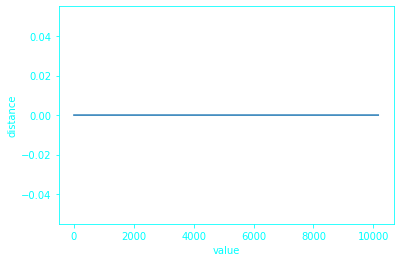

before
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
after
 [3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3.]
******************** cluster_idx
Generic+Sequential
compressed bytes 138
ratio 294.6376811594203
restored count 10165
(0.0, 0.0003662109375, 0.00020192939544392524, 0.0001482744336225853)


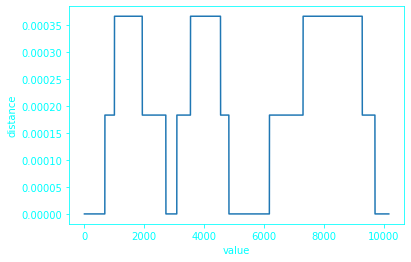

before
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
after
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
******************** tensor1
Generic+Sequential
compressed bytes 167582
ratio 2.1836474084328867
restored count 91485
(0.0, 6.891787052154541e-08, 3.435247585636713e-08, 1.9861699455317332e-08)


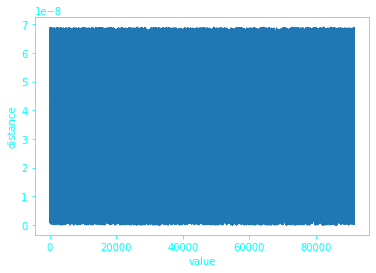

before
 [ 4.6402210e-04  2.1864673e-05 -1.3112162e-05  2.1864673e-05
  5.1413313e-04 -3.4968150e-05 -1.3112162e-05 -3.4968150e-05
  4.7679365e-04  4.4859896e-04  2.4257266e-05 -1.7004028e-05
  2.4257266e-05  5.0378015e-04 -4.5093253e-05 -1.7004028e-05
 -4.5093253e-05  4.7106168e-04  4.3442045e-04  2.2722310e-05
 -1.6282571e-05  2.2722310e-05  4.9375778e-04 -4.8039368e-05
 -1.6282571e-05 -4.8039368e-05  4.6114341e-04  4.0422191e-04
  3.8572485e-05 -3.1007745e-05]
after
 [ 4.64030833e-04  2.18501664e-05 -1.30841509e-05  2.18501664e-05
  5.14094194e-04 -3.49524780e-05 -1.30841509e-05 -3.49524780e-05
  4.76821733e-04  4.48626641e-04  2.43258546e-05 -1.70727144e-05
  2.43258546e-05  5.03778865e-04 -4.51302039e-05 -1.70727144e-05
 -4.51302039e-05  4.71045205e-04  4.34460409e-04  2.26754346e-05
 -1.62475044e-05  2.26754346e-05  4.93738742e-04 -4.80184681e-05
 -1.62475044e-05 -4.80184681e-05  4.61142568e-04  4.04202321e-04
  3.86296888e-05 -3.09639145e-05]


In [20]:
ratios2 = []
for i in range(len(scalars)):
    print('*'*20, scalar_names[i])
    print('Generic+Sequential')
    scalar = scalars[i].ravel()
    compressed_scalars = DracoPy.encode_point_cloud_to_buffer(scalar, position=False, sequential=True, quantization_bits=14, create_metadata=True)
    print('compressed bytes', len(compressed_scalars))
    ratio = scalar.nbytes / len(compressed_scalars)
    ratios2.append(ratio)
    print('ratio', ratio)
    restored_scalars = DracoPy.decode_point_cloud_buffer(compressed_scalars)
    print('restored count', len(restored_scalars.points))
    stats, distances = TKO.Util.error(scalar.ravel()[0:len(restored_scalars.points)], restored_scalars.points)
    print(stats)
    TKO.Util.plot(distances, 'value', 'distance')
    print('before\n', scalar[0:30])
    print('after\n', np.array(restored_scalars.points[0:30]))

In [21]:
print(scalar_names)
print('position', ratios1)
print('generic', ratios2)

['EstimatedUncertainty', 'tensor2', 'HemisphereLocataion', 'cluster_idx', 'tensor1']
position [2.640088305954159, 2.27656741859626, 484.04761904761904, 225.88888888888889, 2.2903171294992397]
generic [2.671484888304862, 2.2224516567874844, 535.0, 294.6376811594203, 2.1836474084328867]
